Linear regression program that goes from manual data  to calculation to prediction to visualization using only basic Python without using sklearn.

In [28]:
import matplotlib.pyplot as plt

Independent variable (x) -> Diameter of Pizza
Dependent variable (y) -> Price of Pizza

In [29]:
x=[8,10,12]
y=[10,13,16]

Calculate the means of x and y

In [30]:
mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

Calculating the slope(m)

In [31]:
numerator = 0
denominator = 0

In [32]:
for i in range(len(x)):
    numerator += (x[i] - mean_x) * (y[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2

In [33]:
m = numerator / denominator
b = mean_y - (m * mean_x)

In [34]:
print(f"Equation of the line: y = {m:.2f}x + {b:.2f}")

Equation of the line: y = 1.50x + -2.00


Predict price for a new diameter

In [35]:
new_diameter = 20
predicted_price = m * new_diameter + b
print(f"Predicted price for a {new_diameter}-inch pizza: ${predicted_price:.2f}")

Predicted price for a 20-inch pizza: $28.00


plot original data points

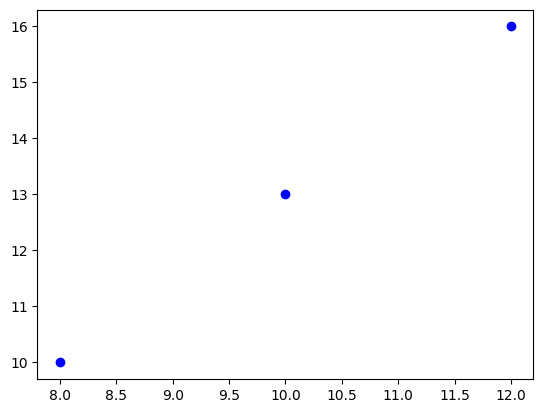

In [36]:
plt.scatter(x, y, color='blue', label='Original Data')